In [11]:
from matplotlib.pyplot import figure, rcParams
from conf_matplotlib import conf_matplotlib_oscuro
conf_matplotlib_oscuro()

In [1]:
from astropy import units as u

In [2]:
from poliastro.bodies import Earth, Mars, Sun

In [3]:
from poliastro.twobody import Orbit

In [4]:
r = [-6045, -3490, 2500]*u.km
v = [-3.457, 6.618, 2.533]*u.km/u.s

In [5]:
ss = Orbit.from_vectors(Earth, r, v)

In [6]:
ss

7283 x 10293 km x 153.2 deg (GCRS) orbit around Earth (♁) at epoch J2000.000 (TT)

In [7]:
ss.epoch

<Time object: scale='tt' format='jyear_str' value=J2000.000>

In [8]:
ss.epoch.iso

'2000-01-01 12:00:00.000'

In [9]:
ss.frame

<GCRS Frame (obstime=J2000.000, obsgeoloc=(0., 0., 0.) m, obsgeovel=(0., 0., 0.) m / s)>

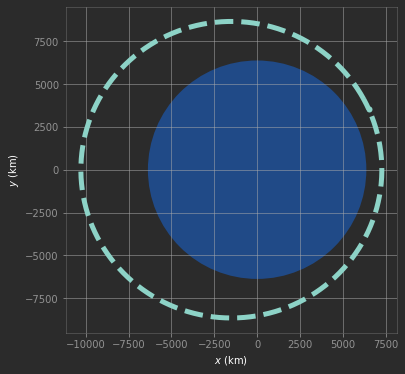

In [13]:
ss.plot();

---

In [14]:
# Data for Mars at J2000 from JPL HORIZONS
a = 1.523679 * u.AU
ecc = 0.093315 * u.one
inc = 1.85 * u.deg
raan = 49.562 * u.deg
argp = 286.537 * u.deg
nu = 23.33 * u.deg

ss = Orbit.from_classical(Sun, a, ecc, inc, raan, argp, nu)

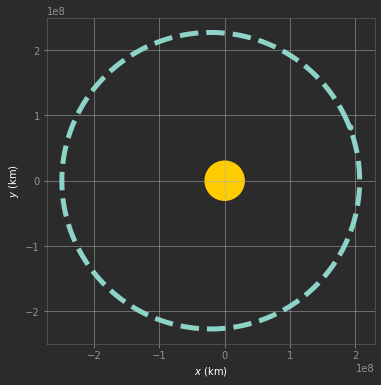

In [15]:
ss.plot()

In [16]:
ss.period.to(u.day)

<Quantity 686.97138348 d>

In [17]:
ss.v

<Quantity [ 1.16420212, 26.29603633,  0.52229379] km / s>

---

In [19]:
from poliastro.examples import iss
iss

6772 x 6790 km x 51.6 deg (GCRS) orbit around Earth (♁) at epoch 2013-03-18 12:00:00.000 (UTC)

In [20]:
iss.epoch

<Time object: scale='utc' format='iso' value=2013-03-18 12:00:00.000>

In [21]:
iss.nu.to(u.deg)

<Quantity 46.59580468 deg>

In [22]:
iss.n.to(u.deg / u.min)

<Quantity 3.88701058 deg / min>

In [23]:
iss_30m = iss.propagate(30 * u.min)
iss_30m.epoch  # Notice we advanced the epoch!

<Time object: scale='utc' format='iso' value=2013-03-18 12:30:00.000>

In [24]:
iss_30m.nu.to(u.deg)

<Quantity 163.1409362 deg>

---

In [25]:
from poliastro.twobody.propagation import cowell
from numba import njit

In [26]:
r0 = [-2384.46, 5729.01, 3050.46] * u.km
v0 = [-7.36138, -2.98997, 1.64354] * u.km / u.s
initial = Orbit.from_vectors(Earth, r0, v0)

In [27]:
@njit
def accel(t0, state, k):
    """Constant acceleration aligned with the velocity. """
    v_vec = state[3:]
    norm_v = (v_vec * v_vec).sum() ** .5
    return 1e-5 * v_vec / norm_v

In [28]:
initial.propagate(3 * u.day, method=cowell, ad=accel)

18255 x 21848 km x 28.0 deg (GCRS) orbit around Earth (♁) at epoch J2000.008 (TT)

In [29]:
from poliastro.core.perturbations import J2_perturbation

In [30]:
tof = (48.0 * u.h).to(u.s)
final = initial.propagate(tof, method=cowell, ad=J2_perturbation,
                          J2=Earth.J2.value, R=Earth.R.to(u.km).value)

In [31]:
((final.raan - initial.raan) / tof).to(u.deg / u.h)

<Quantity -0.17232668 deg / h>

In [32]:
((final.argp - initial.argp) / tof).to(u.deg / u.h)

<Quantity 0.28220397 deg / h>

---

In [33]:
from poliastro.twobody.thrust import change_inc_ecc
from poliastro.twobody import Orbit
from poliastro.bodies import Earth
from poliastro.twobody.propagation import cowell
from astropy import units as u
from astropy.time import Time

In [43]:
ecc_0, ecc_f = 0.4, 0.0
a = 42164
inc_0, inc_f = 0.0, (20.0 * u.deg).to(u.rad).value
argp = 0.0
f = 2.4e-7
k = Earth.k.to(u.km**3 / u.s**2).value
s0 = Orbit.from_classical(Earth, a * u.km, ecc_0 * u.one, inc_0 * u.deg,
                          0 * u.deg, argp * u.deg, 0 * u.deg,
                          epoch=Time(0, format='jd', scale='tdb'))
a_d, _, _, t_f = change_inc_ecc(s0, ecc_f, inc_f, f)
sf = s0.propagate(t_f * u.s, method=cowell, ad=a_d, rtol=1e-8)

In [36]:
sf.inc

<Quantity 0.34719734 rad>

In [37]:
sf.ecc

<Quantity 0.00894511>

In [46]:
s0

25298 x 59030 km x 0.0 deg (GCRS) orbit around Earth (♁) at epoch 0.0 (TDB)

In [47]:
sf

41759 x 42513 km x 19.9 deg (GCRS) orbit around Earth (♁) at epoch 85.14424277645628 (TDB)

In [48]:
from poliastro.core import perturbations

In [52]:
Orbit.from_vectors?

Signature:
Orbit.from_vectors(
    attractor,
    r,
    v,
    epoch=<Time object: scale='tt' format='jyear_str' value=J2000.000>,
    plane=<Planes.EARTH_EQUATOR: 'Earth mean Equator and Equinox of epoch (J2000.0)'>,
)
Docstring:
Return `Orbit` from position and velocity vectors.

Parameters
----------
attractor : Body
    Main attractor.
r : ~astropy.units.Quantity
    Position vector wrt attractor center.
v : ~astropy.units.Quantity
    Velocity vector.
epoch : ~astropy.time.Time, optional
    Epoch, default to J2000.
plane : ~poliastro.frames.Planes
    Fundamental plane of the frame.
File:      /usr/local/Caskroom/miniconda/base/lib/python3.7/site-packages/poliastro/twobody/orbit.py
Type:      method
